In [1]:
import cv2
import sys
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
src =cv2.imread('./fig/puppy_shrink.png', 0)

# minMaxLoc(src[, mask]) -> minVal, maxVal, minLoc, maxLoc
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src)
# minVal = 100.0, maxVal = 184.0
print(minVal, maxVal)

dst_norm = np.clip((src - minVal)*255./(maxVal-minVal), 0, 255).astype(np.uint8)

# calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
hist = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_norm = cv2.calcHist([dst_norm], [0], None, [256], [0, 256])


plt.plot(hist_color= 'b')
plt.plot(hist_norm, color='r')

plt.plot(hist)
plt.show()

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
np.clip(1.1 ).astype(np.uint8)

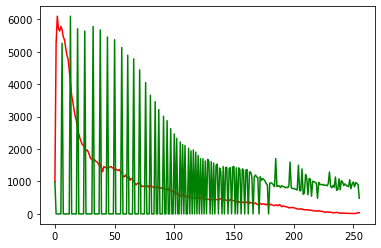

In [7]:
# src =cv2.imread('./fig/puppy_shrink.png', 0)
src = cv2.imread('./fig/manjang.jpg',cv2.IMREAD_REDUCED_GRAYSCALE_2)


dst_norm = cv2.normalize(src, None, 0, 255, cv2.NORM_MINMAX, -1)
dst_equal = cv2.equalizeHist(src)

# calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
hist = cv2.calcHist([src], [0], None, [256], [0, 256])
hist_norm = cv2.calcHist([dst_norm], [0], None, [256], [0, 256])
hist_equal = cv2.calcHist([dst_equal], [0], None, [256], [0, 256])


plt.plot(hist_color= 'b')
plt.plot(hist_norm, color='r')
plt.plot(hist_equal, color='g')

plt.show()

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_equal', dst_equal)

cv2.waitKey()
cv2.destroyAllWindows()

In [11]:
src = cv2.imread('./fig/spring_in_park.jpg', cv2.IMREAD_REDUCED_COLOR_2)

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(src_hsv)

v_norm = cv2.normalize(v, None, 0, 255, cv2.NORM_MINMAX, -1)
v_equal = cv2.equalizeHist(v)

dst_norm = cv2.merge((h, s, v_norm))
dst_equal = cv2.merge((h, s, v_equal))

dst_norm = cv2.cvtColor(dst_norm, cv2.COLOR_HSV2BGR)
dst_equal = cv2.cvtColor(dst_equal, cv2.COLOR_HSV2BGR)

cv2.imshow('src', src)
cv2.imshow('dst_norm', dst_norm)
cv2.imshow('dst_equal', dst_equal)

cv2.waitKey()
cv2.destroyAllWindows()

## 파레트

In [12]:
src = cv2.imread('./fig/palette.png')
# src = cv2.imread('./fig/palette_dark.png')

src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

# inRange(src, lowerb, upperb[, dst]) -> dst
# src: 입력영상
# lowerb: 하한값 (0,0,0)
# upperb: 상한값 (255,255,255)

dst1 = cv2.inRange(src, (0, 100, 0), (80, 255, 80)) # b, g, r
dst2 = cv2.inRange(src_hsv, (50, 50, 0), (70, 255, 255)) # h(색), s(순도), v(밝기)

dst = cv2.copyTo(src, dst2)

cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst_hsv', dst2)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

## 트랙바 콜

In [10]:
def call_track(pos):
    hmin = cv2.getTrackbarPos('h_min', 'dst')
    hmax = cv2.getTrackbarPos('h_max', 'dst')
    
    dst = cv2.inRange(src, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow('dst', dst)

src = cv2.imread('./fig/palette.png')

cv2.imshow('src', src)
cv2.namedWindow('dst')
cv2.createTrackbar('h_min', 'dst', 50, 179, call_track)
cv2.createTrackbar('h_max', 'dst', 100, 179, call_track)


cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


## 과제

In [2]:
def call_track(pos):
    hmin = cv2.getTrackbarPos('h_min', 'dst')
    hmax = cv2.getTrackbarPos('h_max', 'dst')
    
    dst = cv2.inRange(src, (hmin, 150, 0), (hmax, 255, 255))
    cv2.imshow('dst', dst)

    
src = cv2.imread('./fig/chromakey.png')
# dst = cv2.imread('./fig/autumn.jpg', cv2.IMREAD_REDUCED_COLOR_4)


# h,w = src.shape[:2]

# dst = cv2.resize(dst, (300, 400))

# crop = src[5:5+400, 210:210+300]

# mask = dst[:,:,-1]
# dst1 = dst[:,:,0:3]

# cv2.copyTo(dst1, mask, crop)

cv2.imshow('src', src)
cv2.namedWindow('dst')

# cv2.imshow('dst', dst)
# cv2.imshow('dst_resize', dst_resize)
cv2.createTrackbar('h_min', 'dst', 50, 179, call_track)
cv2.createTrackbar('h_min', 'dst', 100, 179, call_track)

cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


TypeError: 'tuple' object is not callable

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:862: error: (-215:Assertion failed) trackbar in function 'cv::getTrackbarPos'
